In [3]:
import sys
from Data import Data, createMetadataIfNone
from OpticsData import OpticsData
# import optotransportanalysis
import matplotlib.pyplot as plt
import matplotlib
import numpy
import pandas
import scipy
import os
from matplotlib import gridspec
from matplotlib import cm

### 01 Initial spectra from bulk

In [15]:
dat1 = OpticsData()

/Users/jackbarlow/OptoTransportAnalysis/src/OptoTransport/Data.py:27: UserWarning: No metadata file selected
  warnings.warn('No metadata file selected')


In [8]:
dat1.data

Wavelength    Intensity  Exposure started time stamp  \
0     1018.142446  6356.600098                          NaN   
1     1018.303235  6362.600098                          NaN   
2     1018.464021  6409.600098                          NaN   
3     1018.624806  6398.600098                          NaN   
4     1018.785588  6432.000000                          NaN   
...           ...          ...                          ...   
1019  1180.663517  7507.000000                          NaN   
1020  1180.821498  7538.600098                          NaN   
1021  1180.979475  7519.000000                          NaN   
1022  1181.137450  7528.799805                          NaN   
1023  1181.295421  7483.200195                          NaN   

      Exposure ended time stamp  Frame  
0                           NaN      1  
1                           NaN      1  
2                           NaN      1  
3                           NaN      1  
4                           NaN      1  
...                         ...    ...  
1019                        NaN      1  
1020                        NaN      1  
1021                        NaN      1  
1022                        NaN      1  
1023                        NaN      1  

[1024 rows x 5 columns]

In [12]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8,7)
fig.set_dpi(1200)
plt.plot(dat1.data['Wavelength'], dat1.data['Intensity'])
plt.title('Initial spectrum from thin bulk flake', fontdict=title_font_options)
plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.ylabel('Intensity (counts)', fontdict=axis_font_options)
plt.show()

In [16]:
# useful line for saving to relative figures folder
fig_dir = os.path.dirname(dat1.dir) + '/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "01 Initial Spectrum.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)


### 02 Field Dependence w Polarization

In [2]:
RCP = []
dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/02_FieldDep_Pol_2L'
filename_root = '_RCP_FieldDep_2L.csv'
for i in range(13):
    RCP.append(OpticsData(fn=dir + '/02_' + str(i+1) + filename_root))

In [ ]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8,7)
fig.set_dpi(1200)
for i in range(6,13):
    field = RCP[i].metadata['Field']
    plt.plot(RCP[i].data['Wavelength'], RCP[i].data['Var1'],
            label=r'μ$_0$H = ' + f'{field:.2f}T')
plt.title('Right circularly polarized ouptut from 2L flake', fontdict=title_font_options)
plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.ylabel('Intensity (counts)', fontdict=axis_font_options)
plt.legend()
plt.xlim([1060, 1090])
plt.ylim([12500, 13250])
plt.show()

In [29]:
# useful line for saving to relative figures folder
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "02 FieldDep RCP zoomed.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)


In [5]:
LCP = []
dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/02_FieldDep_Pol_2L'
filename_root = '_FieldDep_LCP.csv'
for i in range(13):
    LCP.append(OpticsData(fn=dir + '/02_' + str(i+1) + filename_root, 
                          fn_md=dir + '/02_' + str(i+1) + '_RCP_FieldDep_2L.json'))

In [ ]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8,7)
fig.set_dpi(1200)

i = 9
field = RCP[i].metadata['Field']
plt.plot(RCP[i].data['Wavelength'], RCP[i].data['Var1'],
            label=r'RCP')
plt.plot(LCP[i].data['Wavelength'], LCP[i].data['Var1'],
            label=r'LCP')
plt.title(r'Spectrum from 2L flake, RCP vs LCP, μ$_0$H = ' + f'{field:.2f} T', 
            fontdict=title_font_options)
plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.ylabel('Intensity (counts)', fontdict=axis_font_options)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
# plt.xlim([1060, 1090])
# plt.ylim([12500, 13250])
plt.show()

In [15]:
# useful line for saving to relative figures folder
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "02 FieldDep RCP vs LCP 1.5T.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)

### 03 Test Exposure Time & Background Removal

In [2]:
RCP = OpticsData()

In [3]:
LCP = OpticsData()

In [4]:
BG = OpticsData()

In [6]:
RCP.data

Intensity1_1  Intensity1_2  Intensity1_3   Wavelength
0            44603         42793         42744  1041.857026
1            44796         42963         42994  1041.932080
2            44878         43100         43108  1042.007132
3            45021         43190         43225  1042.082183
4            45142         43352         43288  1042.157232
...            ...           ...           ...          ...
1019         46814         44784         44756  1117.452115
1020         46739         44593         44647  1117.525331
1021         46626         44553         44549  1117.598545
1022         46549         44573         44462  1117.671757
1023         46493         44409         44425  1117.744967

[1024 rows x 4 columns]

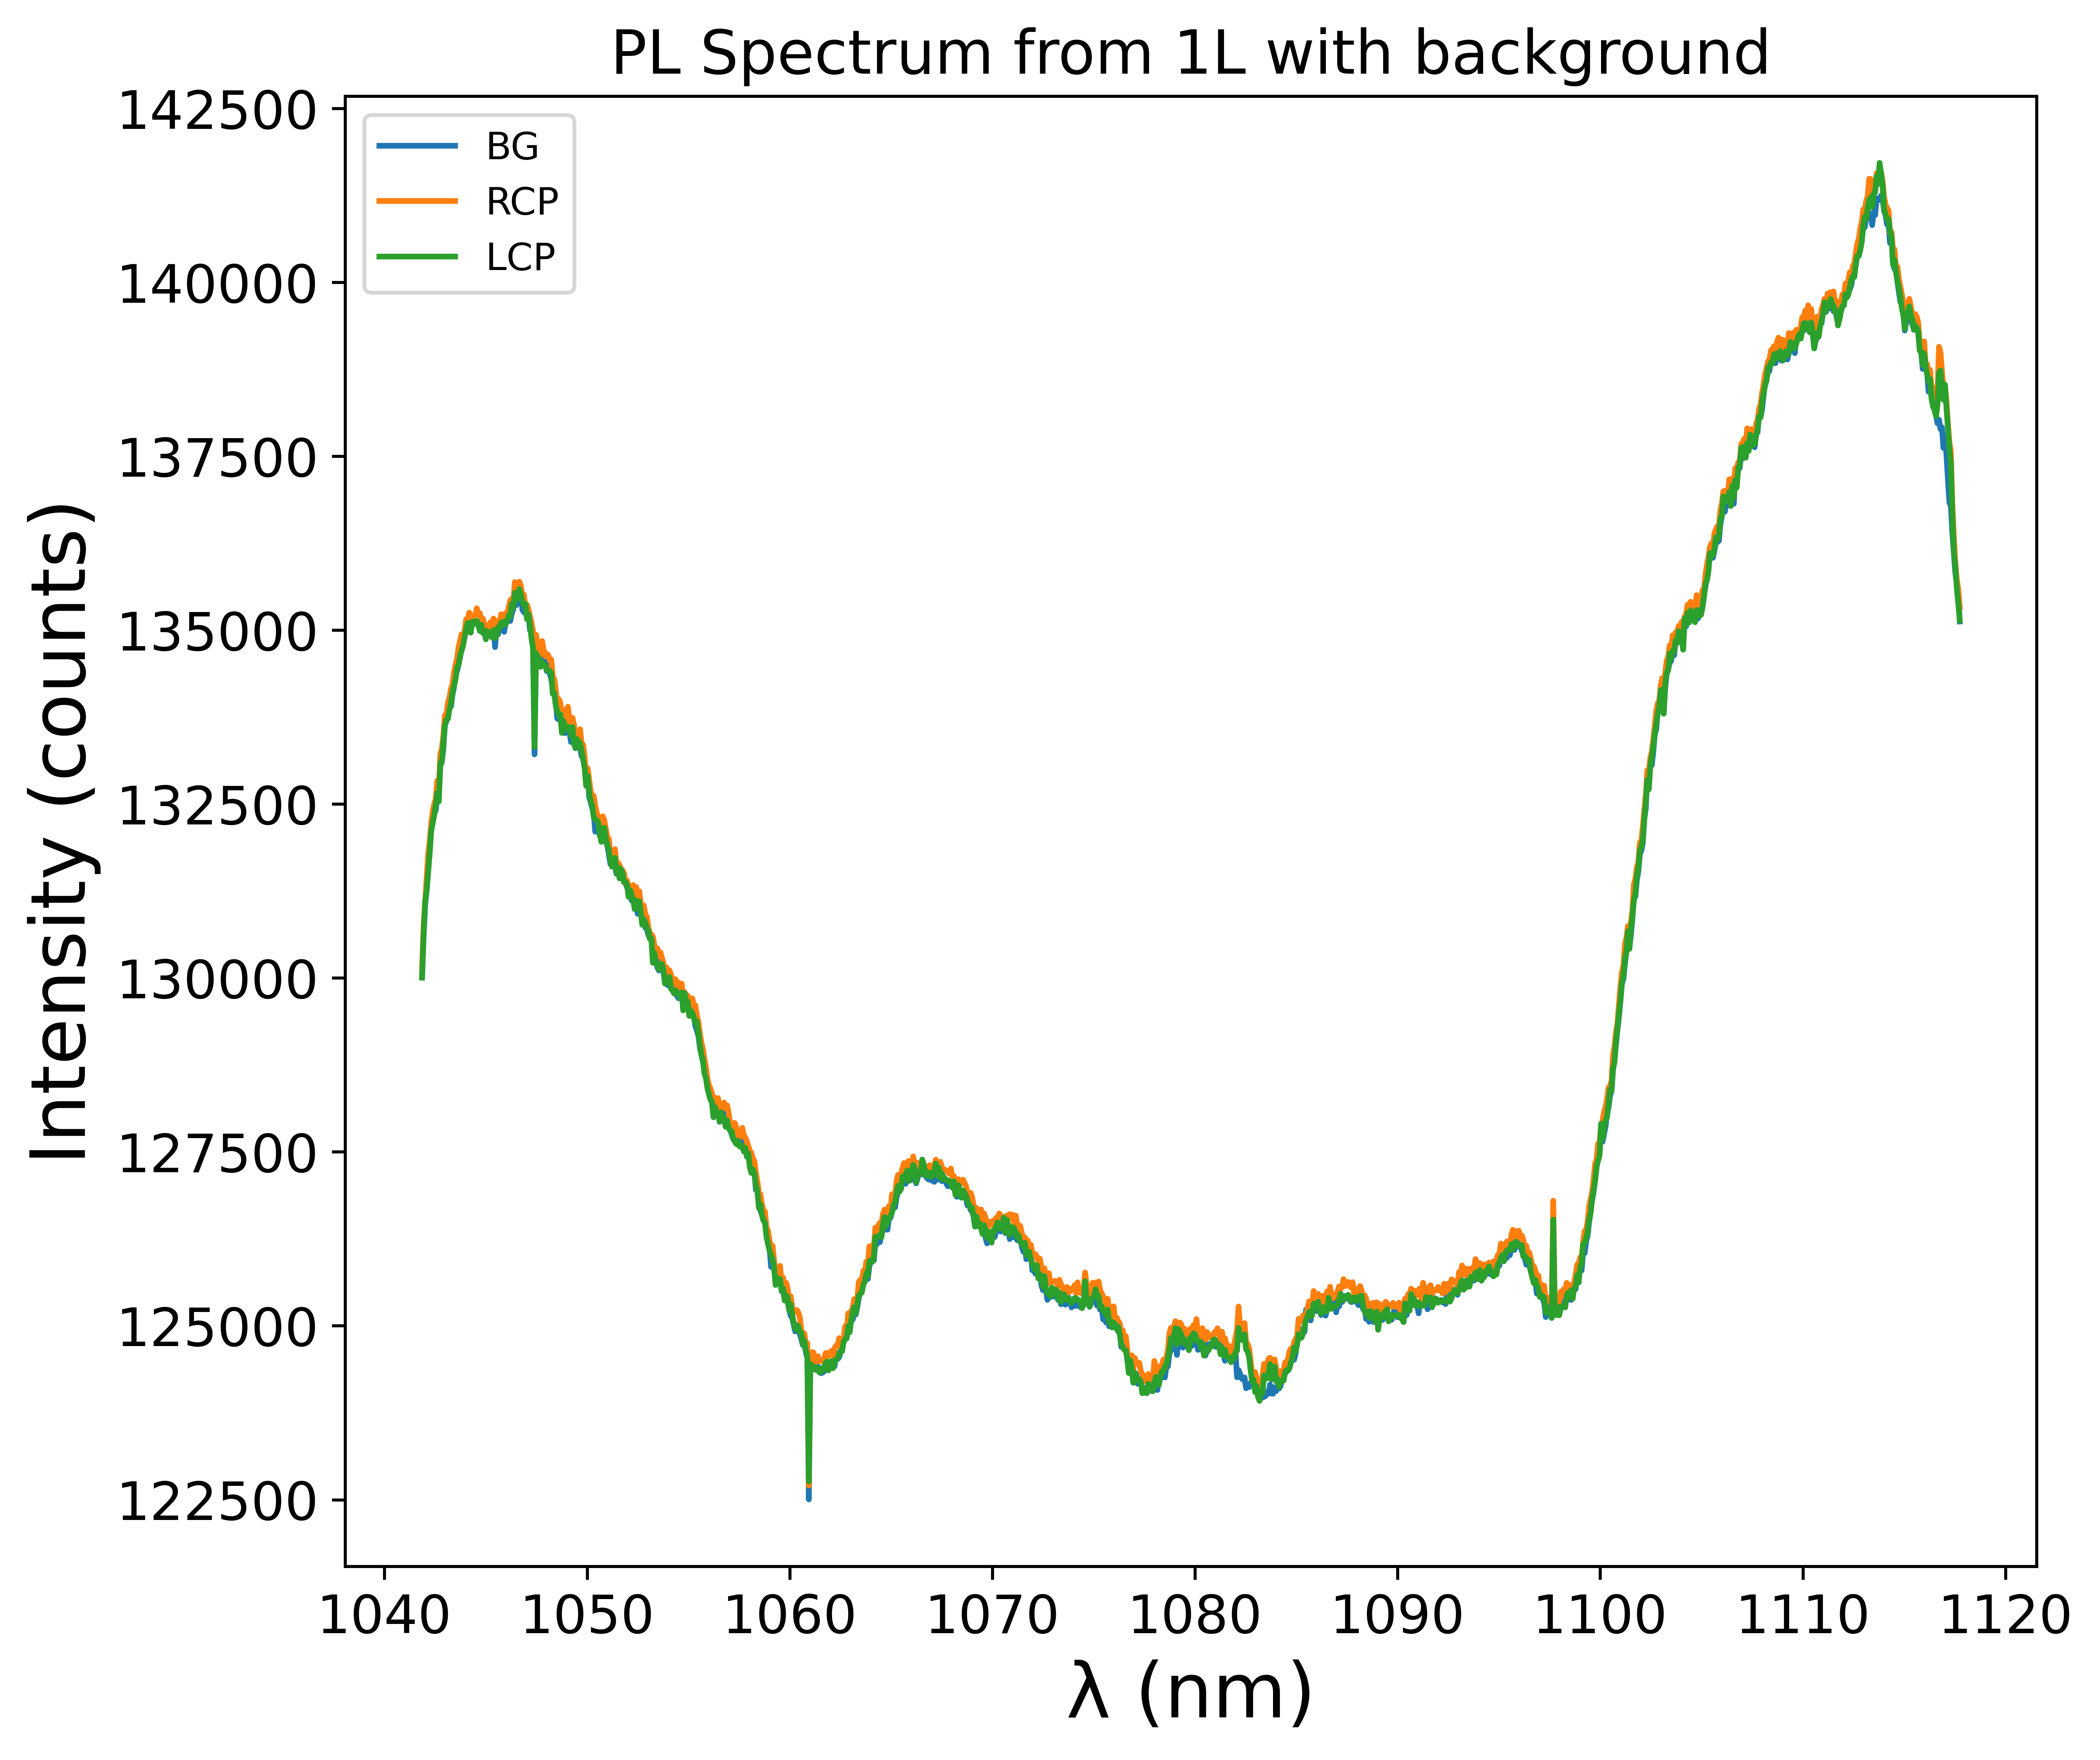

In [12]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8,7)
fig.set_dpi(800)

RCP_sum = RCP.data['Intensity1_1'] + RCP.data['Intensity1_2'] + RCP.data['Intensity1_3']
LCP_sum = LCP.data['Intensity1_1'] + LCP.data['Intensity1_2'] + LCP.data['Intensity1_3']
BG_sum = BG.data['Intensity1_1'] + BG.data['Intensity1_2'] + BG.data['Intensity1_3']

plt.plot(BG.data['Wavelength'], BG_sum, label='BG')
plt.plot(RCP.data['Wavelength'], RCP_sum , label=r'RCP')
plt.plot(LCP.data['Wavelength'], LCP_sum, label=r'LCP')

plt.title(r'PL Spectrum from 1L with background', 
            fontdict=title_font_options)
plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.ylabel('Intensity (counts)', fontdict=axis_font_options)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
# plt.xlim([1060, 1090])
# plt.ylim([12500, 13250])
plt.show()

In [13]:
# useful line for saving to relative figures folder
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "03 TestExpTime 30min RCP vs LCP plus BG.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)

In [14]:
RCP.metadata

{'Temp': 1.9998807907104492,
 'Field': 2.785530686378479e-05,
 'exp_time': 600,
 'num_frames': 3,
 'pol': 'RCP',
 'power': 1e-06,
 'sample': 'Flake #1, 1L',
 'grating': '600g/mmm, 1um Blaze'}

### 04 Comparing to surrounding flakes

In [31]:
RCP_2L = OpticsData()

In [42]:
RCP_2L.metadata

{'meas_Temp': 2.135779857635498,
 'meas_Field': 1.5000029296875,
 'exp_time': 600,
 'num_frames': 3,
 'power': 1e-06,
 'sample': 'Flake #1 2L',
 'grating': '600g/mm, 1um blaze',
 'pol': 'RCP'}

In [33]:
LCP_2L = OpticsData()

/Users/jackbarlow/OptoTransportAnalysis/src/OptoTransport/Data.py:47: UserWarning: No metadata file selected
  warnings.warn('No metadata file selected')


In [35]:
RCP_3L = OpticsData()

In [43]:
RCP_3L.metadata

{'meas_Temp': 2.1594998836517334,
 'meas_Field': 1.4999998046875,
 'exp_time': 600,
 'num_frames': 3,
 'power': 1e-06,
 'sample': 'Flake #1 2L',
 'grating': '600g/mm, 1um blaze',
 'pol': 'RCP'}

In [36]:
LCP_3L = OpticsData()

/Users/jackbarlow/OptoTransportAnalysis/src/OptoTransport/Data.py:47: UserWarning: No metadata file selected
  warnings.warn('No metadata file selected')


In [20]:
Sil = OpticsData()

In [21]:
Sil_sum = Sil.data['Intensity_1'] + Sil.data['Intensity_2'] + Sil.data['Intensity_3']
RCP_2L_sum = RCP_2L.data['Intensity_1'] + RCP_2L.data['Intensity_2'] + RCP_2L.data['Intensity_3']
LCP_2L_sum = LCP_2L.data['Intensity_1'] + LCP_2L.data['Intensity_2'] + LCP_2L.data['Intensity_3']
RCP_3L_sum = RCP_3L.data['Intensity1_1'] + RCP_3L.data['Intensity1_2'] + RCP_3L.data['Intensity1_3']
LCP_3L_sum = LCP_3L.data['Intensity_1'] + LCP_3L.data['Intensity_2'] + LCP_3L.data['Intensity_3']

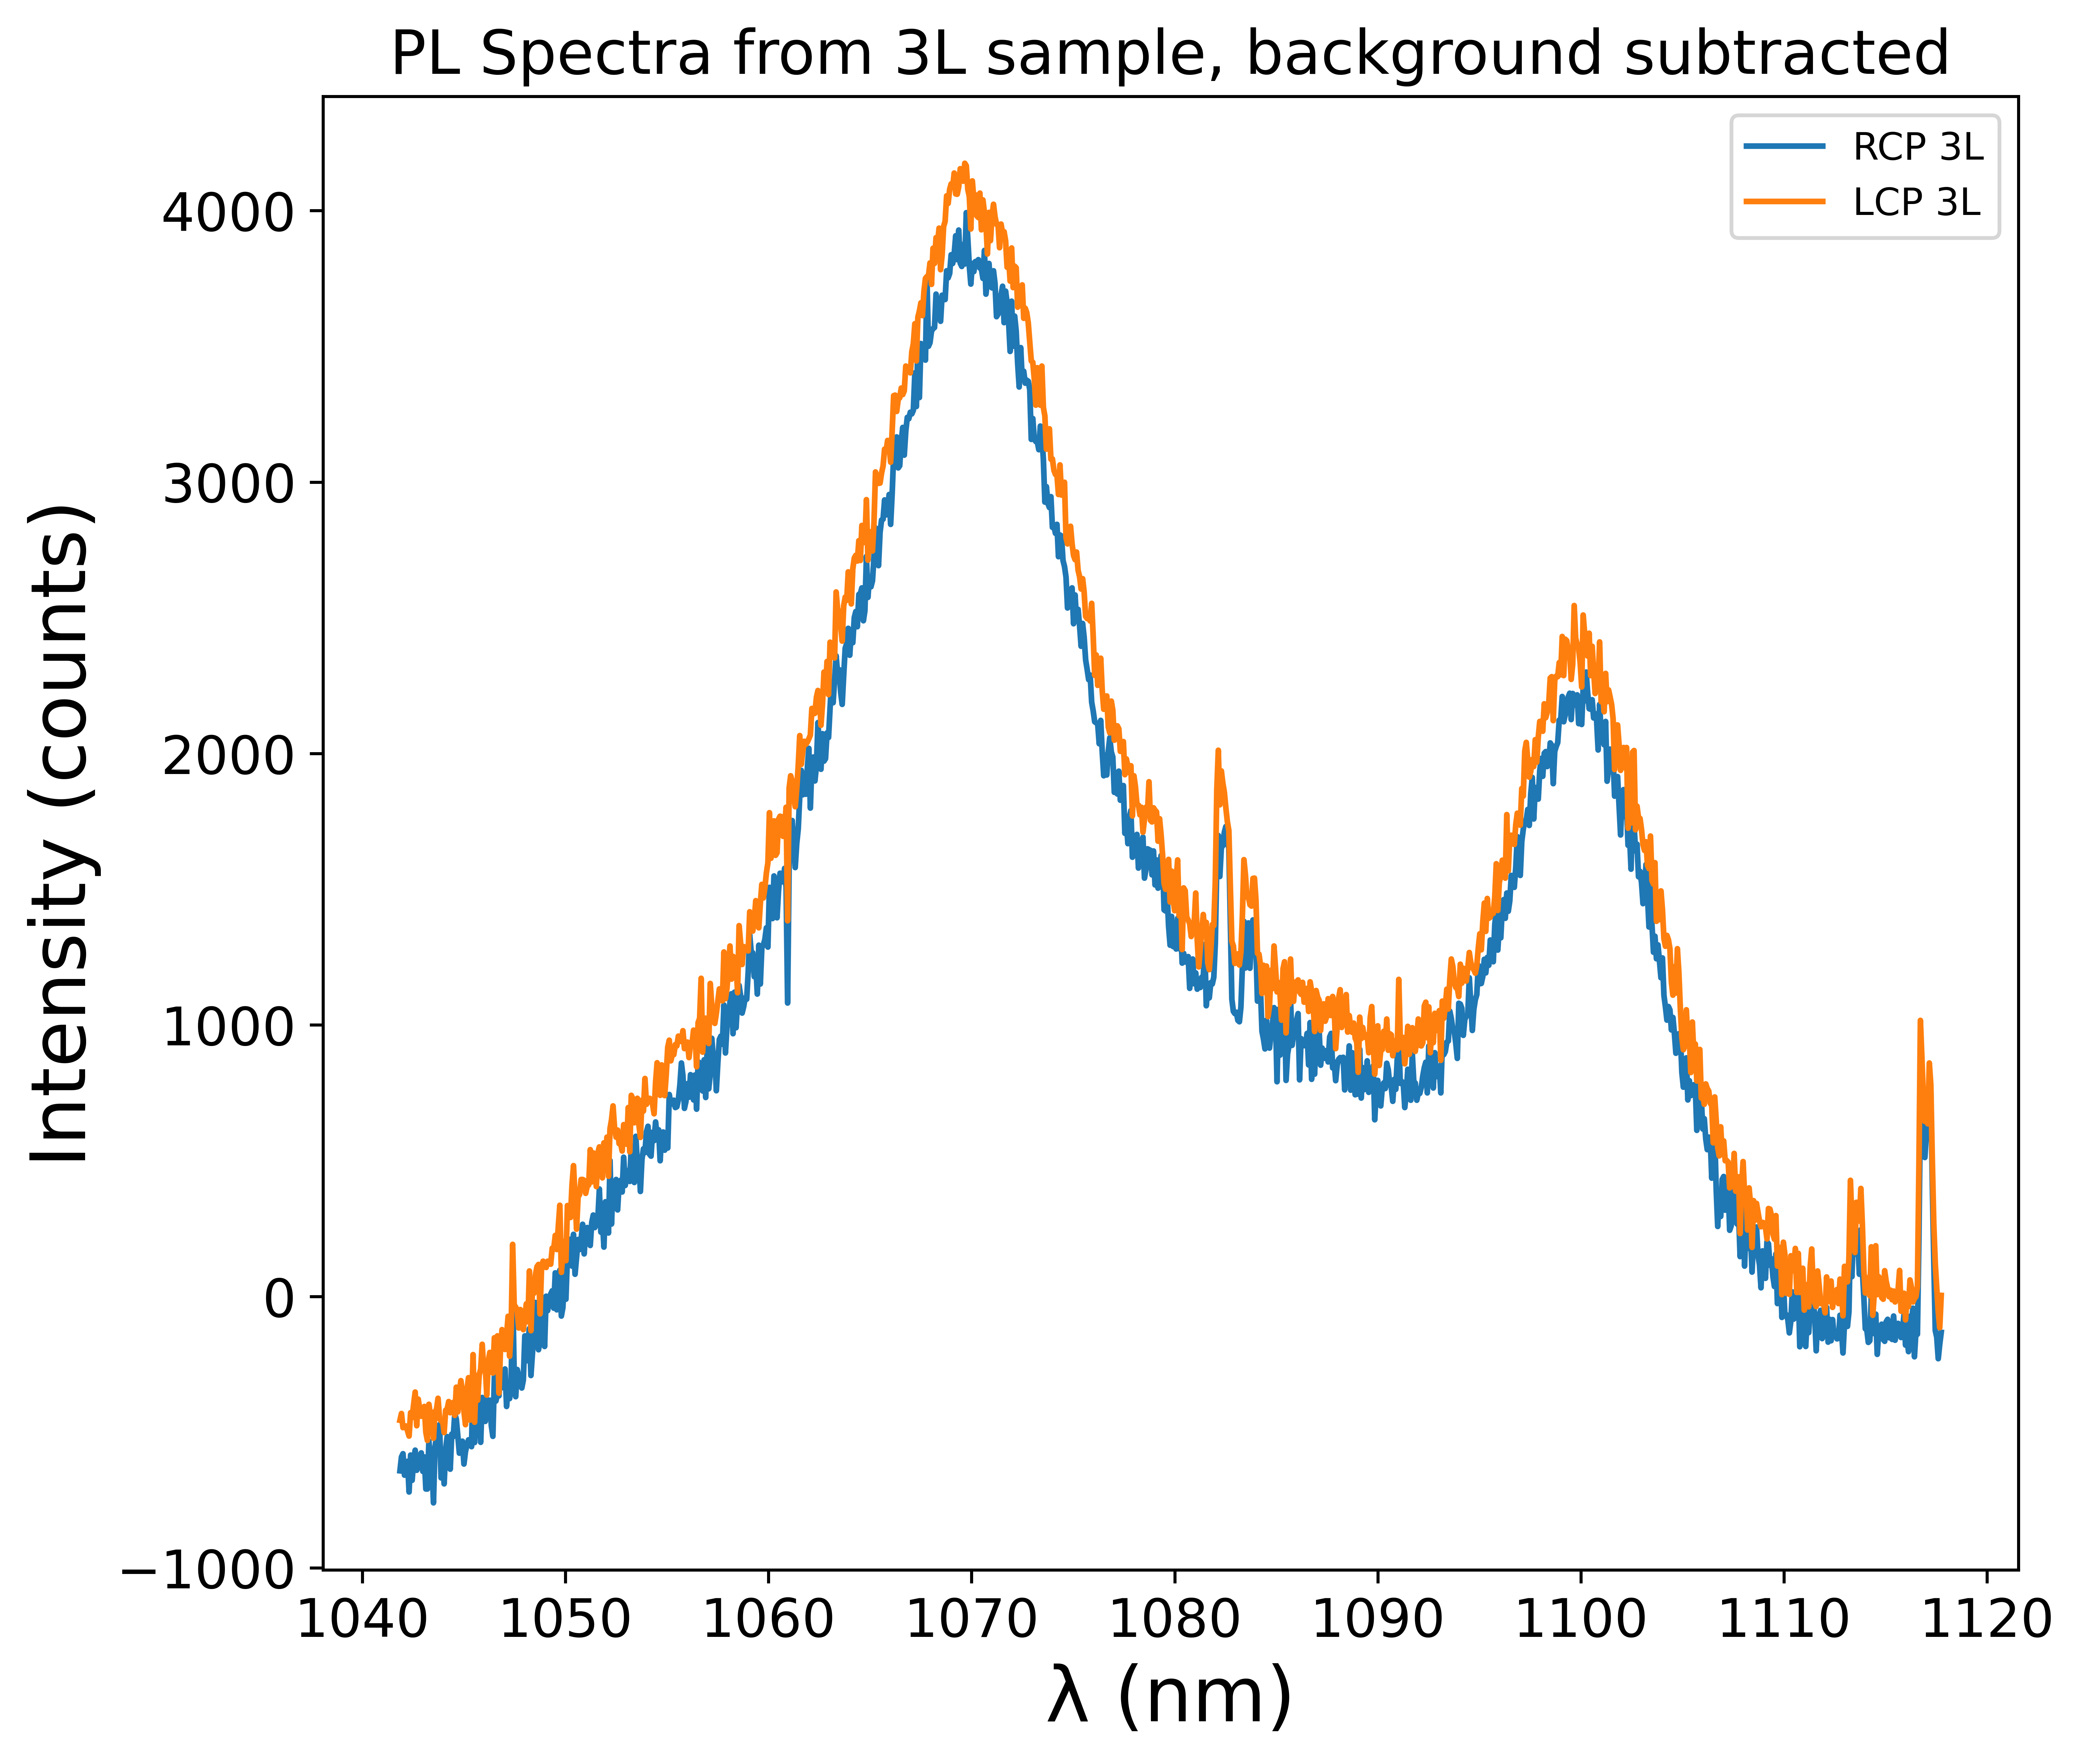

In [37]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8,7)
fig.set_dpi(800)

# plt.plot(BG.data['Wavelength'], BG_sum, label='BG')
# plt.plot(RCP.data['Wavelength'], RCP_sum, label=r'RCP 1L')
# plt.plot(LCP.data['Wavelength'], LCP_sum, label=r'LCP 1L')
# plt.plot(Sil.data['Wavelength'], Sil_sum - BG_sum, label='Si signal')
# plt.plot(RCP_2L.data['Wavelength'], RCP_2L_sum - BG_sum, label=r'RCP 2L')
# plt.plot(LCP_2L.data['Wavelength'], LCP_2L_sum - BG_sum, label=r'LCP 2L')
plt.plot(RCP_3L.data['Wavelength'], RCP_3L_sum - BG_sum, label=r'RCP 3L')
plt.plot(LCP_3L.data['Wavelength'], LCP_3L_sum - BG_sum, label=r'LCP 3L')

plt.title(r'PL Spectra from 3L sample, background subtracted', 
            fontdict=title_font_options)
plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.ylabel('Intensity (counts)', fontdict=axis_font_options)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
# plt.xlim([1060, 1090])
# plt.ylim([12500, 13250])
plt.show()

In [30]:
# useful line for saving to relative figures folder
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "04 Si signal.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')

### 05 Apply fixed magnetic field

In [50]:
dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/05_FixField_PolCheck/'
files = os.listdir(dir)
data = []
for f in files:
    if f.endswith('.csv'):
        print(f)
        data.append(OpticsData(dir+f))

05_FixField_PolCheck_RCP_3L_1.csv
05_FixField_PolCheck_LCP_3L_1.csv
05_FixField_PolCheck_RCP_3L_2.csv
05_FixField_PolCheck_LCP_3L_2.csv
05_FixField_PolCheck_LCP_2L_2.csv
05_FixField_PolCheck_RCP_2L_2.csv
05_FixField_PolCheck_LCP_2L_1.csv
05_FixField_PolCheck_RCP_2L_1.csv


In [51]:
data[0].metadata['sample']

'Flake #1 2L'

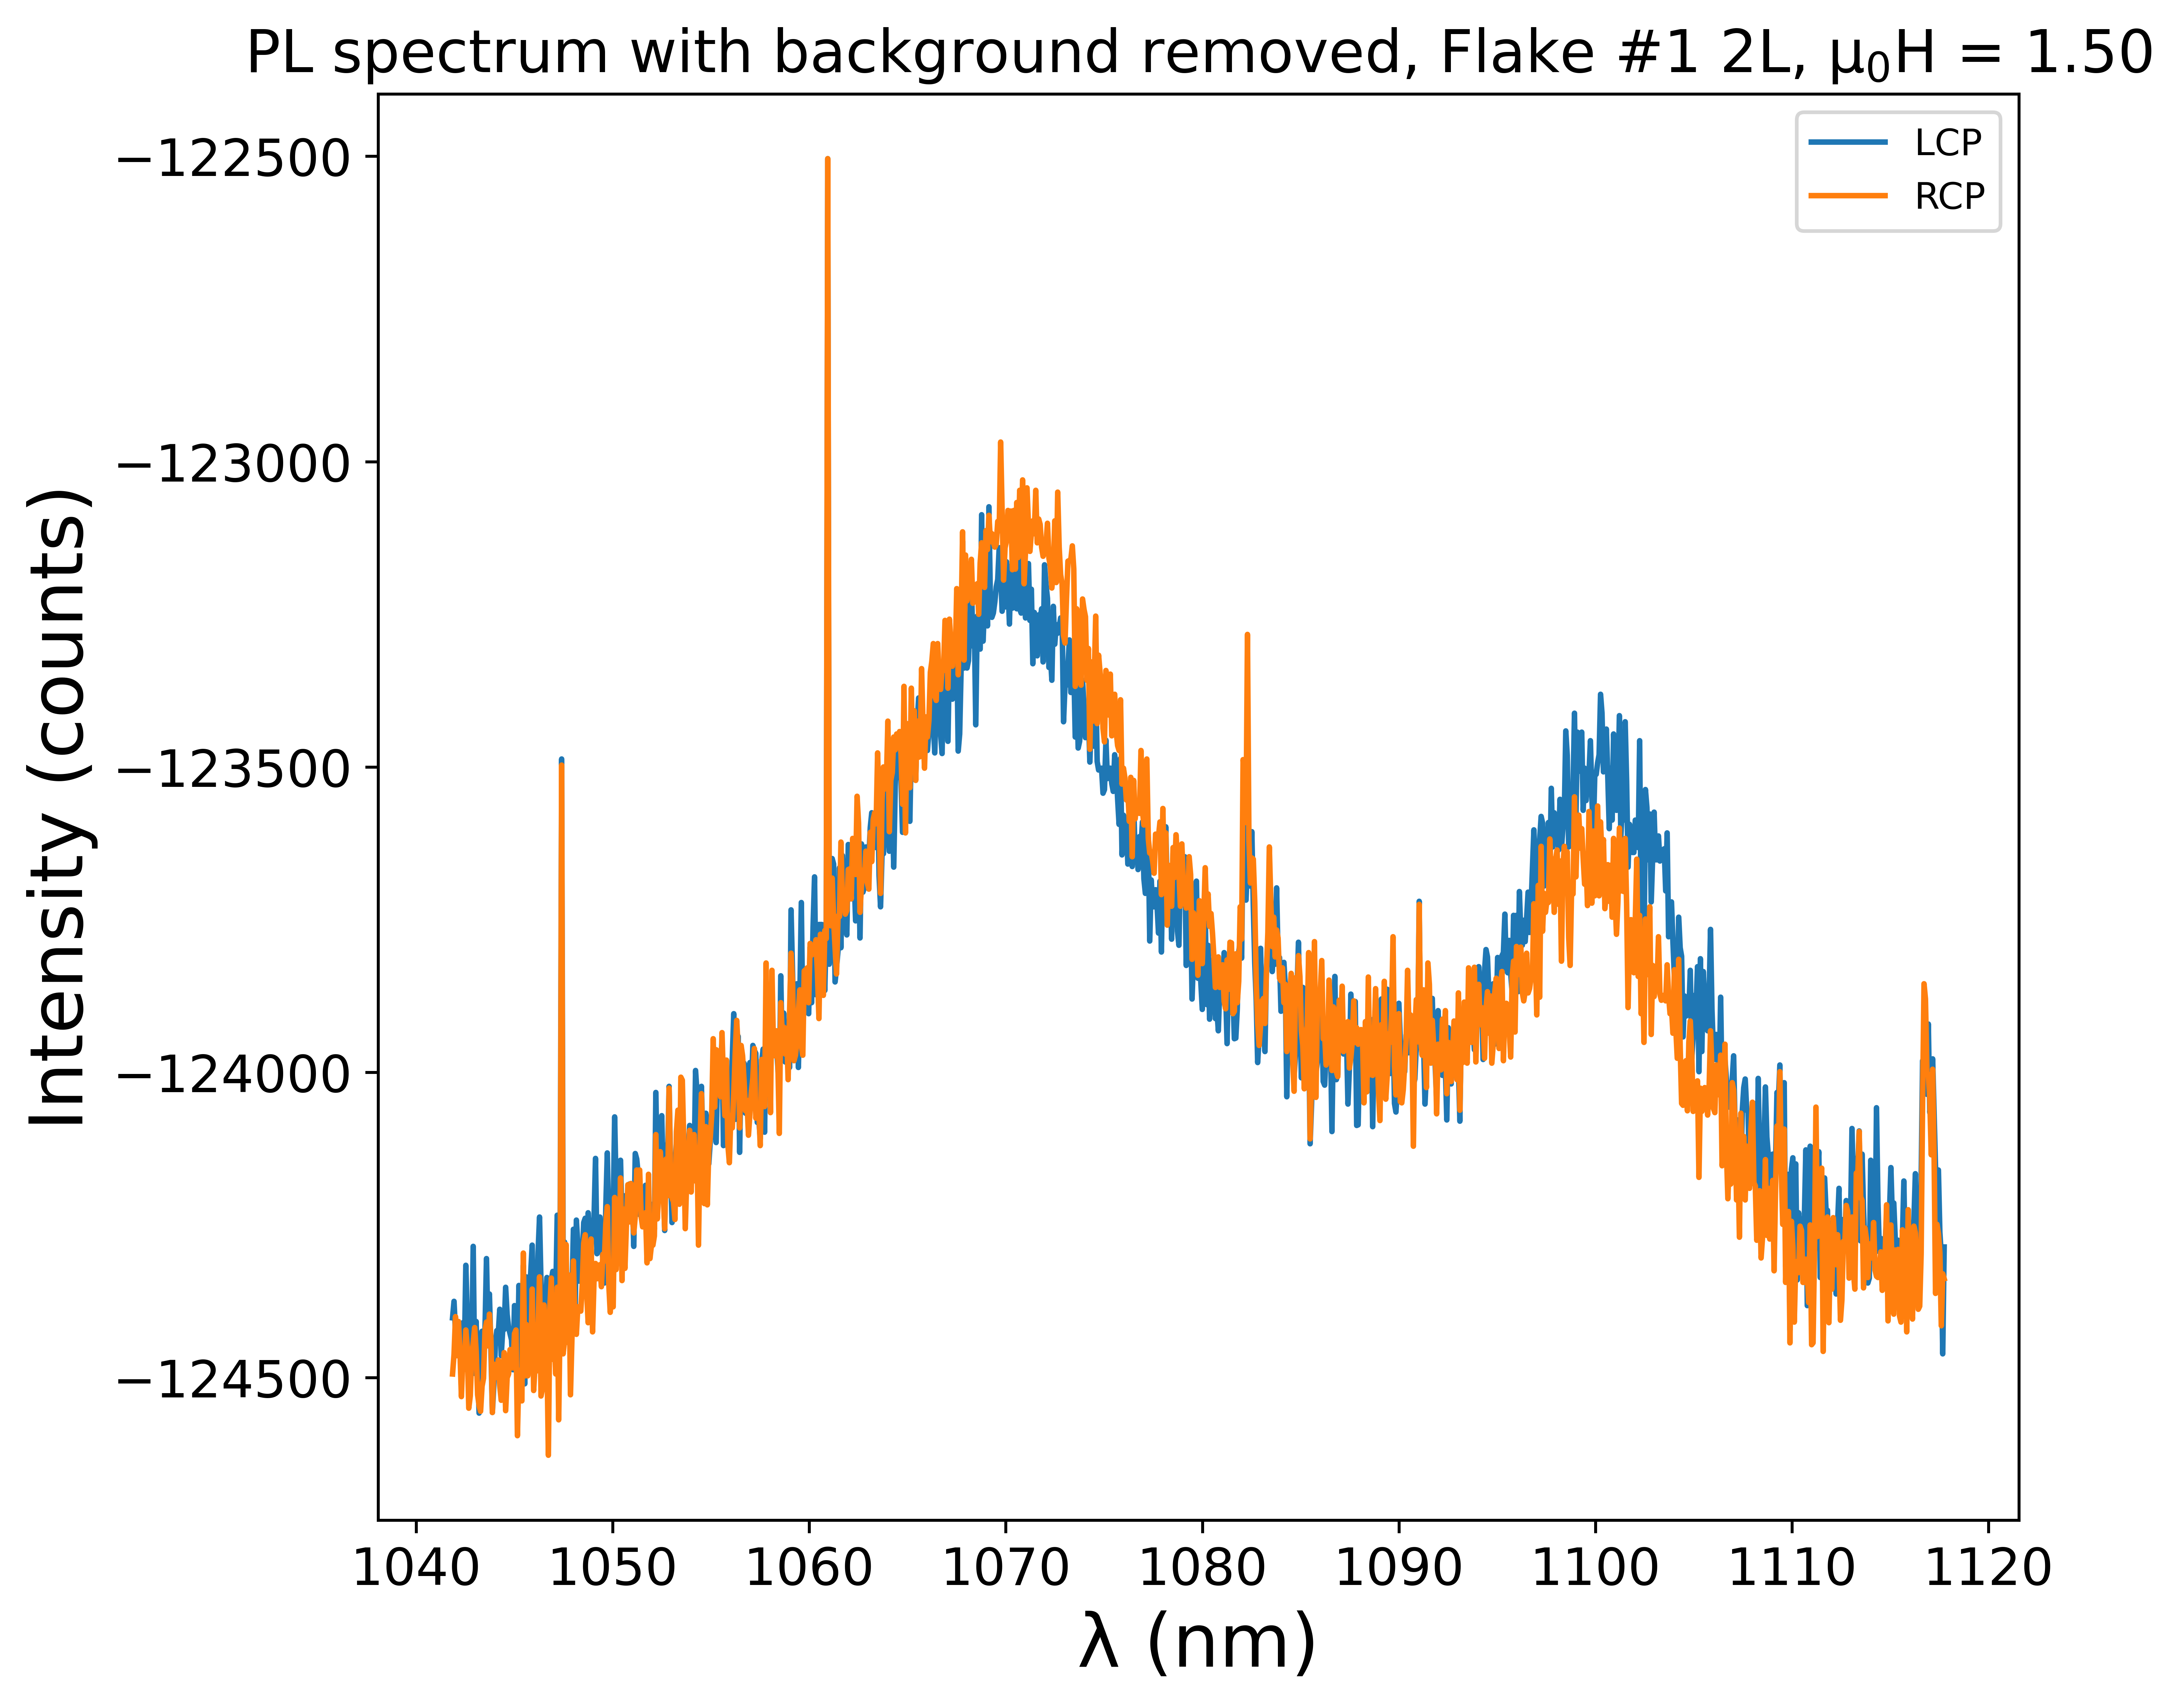

In [77]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8,7)
fig.set_dpi(800)

for dat in data[6:8]:
    field = dat.metadata['meas_Field']
    pol = dat.metadata['pol']
    sample = dat.metadata['sample']
    sum = dat.data['Intensity_1'] + dat.data['Intensity_2'] + dat.data['Intensity_3']
    min = sum.min()
    plt.plot(dat.data['Wavelength'], sum - BG_sum - min,
                label=f'{pol}')

plt.title(f'PL spectrum with background removed, {sample}, ' + r'μ$_0$H = ' + f'{field:.2f}', 
            fontdict=title_font_options)
plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.ylabel('Intensity (counts)', fontdict=axis_font_options)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
# plt.xlim([1060, 1090])
# plt.ylim([12500, 13250])
plt.show()

In [78]:
# useful line for saving to relative figures folder
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "05 3L +1.5T RCP vs LCP PL.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')

### 06 Temperature dependence

In [33]:
dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/06_TempDep/'
files = os.listdir(dir)
files.sort()
Tdata = []
for f in files:
    if f.endswith('.csv'):
        print(f)
        Tdata.append(OpticsData(dir+f))

06_TempDep_2L_10.0K.csv
06_TempDep_2L_15.0K.csv
06_TempDep_2L_2.5K.csv
06_TempDep_2L_20.0K.csv
06_TempDep_2L_25.0K.csv
06_TempDep_2L_30.0K.csv
06_TempDep_2L_35.0K.csv
06_TempDep_2L_38.0K.csv
06_TempDep_2L_39.0K.csv
06_TempDep_2L_40.0K.csv
06_TempDep_2L_41.0K.csv
06_TempDep_2L_42.0K.csv
06_TempDep_2L_43.0K.csv
06_TempDep_2L_45.0K.csv
06_TempDep_2L_47.0K.csv
06_TempDep_2L_5.0K.csv
06_TempDep_2L_50.0K.csv
06_TempDep_2L_52.0K.csv
06_TempDep_2L_55.0K.csv
06_TempDep_2L_57.0K.csv
06_TempDep_2L_60.0K.csv
06_TempDep_2L_62.0K.csv
06_TempDep_2L_65.0K.csv
06_TempDep_3L_10.0K.csv
06_TempDep_3L_15.0K.csv
06_TempDep_3L_2.5K.csv
06_TempDep_3L_20.0K.csv
06_TempDep_3L_25.0K.csv
06_TempDep_3L_30.0K.csv
06_TempDep_3L_35.0K.csv
06_TempDep_3L_38.0K.csv
06_TempDep_3L_39.0K.csv
06_TempDep_3L_40.0K.csv
06_TempDep_3L_41.0K.csv
06_TempDep_3L_42.0K.csv
06_TempDep_3L_43.0K.csv
06_TempDep_3L_45.0K.csv
06_TempDep_3L_47.0K.csv
06_TempDep_3L_5.0K.csv
06_TempDep_3L_50.0K.csv
06_TempDep_3L_52.0K.csv
06_TempDep_3L_55.0K.

In [5]:
BG = OpticsData()

In [6]:
BG_sum = BG.data['Intensity1_1'] + BG.data['Intensity1_2'] + BG.data['Intensity1_3']

In [53]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8,7)
#fig.set_dpi(800)

color1 = (0, 0.4470, 0.7410)
color2 = (0.8500, 0.3250, 0.0980)

num_samples = len(Tdata)/2
i = 0

for dat in Tdata:
    temp = dat.metadata['meas_Temp']
    sample = dat.metadata['sample']
    if sample == 'Flake #1 2L':
        sum = dat.data['Intensity_1'] + dat.data['Intensity_2'] + dat.data['Intensity_3'] - BG_sum
        smooth = numpy.fft.rfft(sum)
        #smooth[200:] = 0
        smooth = numpy.fft.irfft(smooth)
        min = smooth.min()
        plt.plot(dat.data['Wavelength'], smooth - min, label=f'{temp:.1f} K',
                    color=(color1[0] + i/num_samples*(color2[0] - color1[0]), 
                           color1[1] + i/num_samples*(color2[1] - color1[1]), 
                           color1[2] + i/num_samples*(color2[2] - color1[2])))
        i += 1

plt.title(f'Temperature dependent PL spectrum, 2L sample', fontdict=title_font_options)
plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.ylabel('Intensity (counts)', fontdict=axis_font_options)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
# plt.xlim([1060, 1090])
# plt.ylim([12500, 13250])
plt.show()

NameError: name 'Tdata' is not defined

<Figure size 800x700 with 0 Axes>

In [111]:
# useful line for saving to relative figures folder
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "06 Tdep 2D plot 2L.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')

In [66]:
num_samples = len(Tdata)//2
num_lambda = len(Tdata[0].data['Wavelength'])

temps = numpy.zeros(num_samples)
wavelengths = Tdata[0].data['Wavelength']

map_2L = numpy.zeros((num_samples, num_lambda))
map_3L = numpy.zeros((num_samples, num_lambda))

i, j = 0, 0

for dat in Tdata:
    temp = dat.metadata['meas_Temp']
    sample = dat.metadata['sample']
    
    sum = dat.data['Intensity_1'] + dat.data['Intensity_2'] + dat.data['Intensity_3'] - BG_sum
    smooth = numpy.fft.rfft(sum)
    #smooth[200:] = 0
    smooth = numpy.fft.irfft(smooth)
    min = smooth.min()
    smooth = smooth - min
    if sample == 'Flake #1 2L':
        map_2L[i, :] = smooth
        temps[i] = temp
        i += 1
    else:
        map_3L[j, :] = smooth
        j += 1

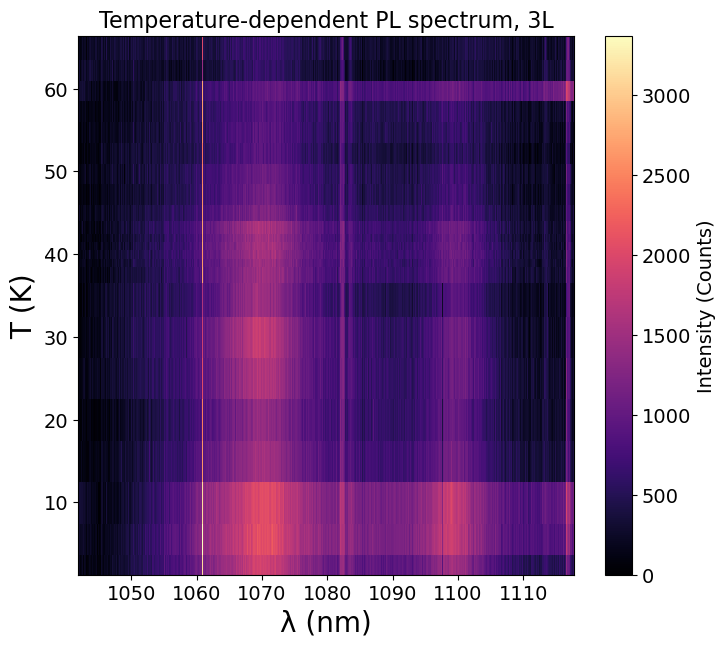

In [119]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8,7)
#fig.set_dpi(800)

plt.pcolor(wavelengths, temps, map_3L, cmap='magma')
plt.ylabel('T (K)', fontdict=axis_font_options)
plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.title('Temperature-dependent PL spectrum, 3L', fontdict=title_font_options)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
cbar = plt.colorbar()
cbar.set_label('Intensity (Counts)', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.show()

In [120]:
# useful line for saving to relative figures folder
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "06 TempDep colormap 3L.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')

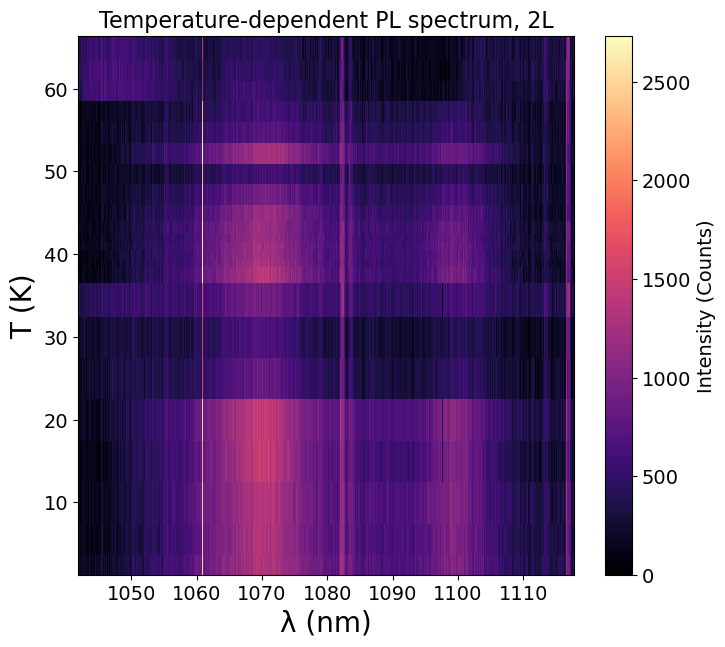

In [121]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8,7)
#fig.set_dpi(800)

plt.pcolor(wavelengths, temps, map_2L, cmap='magma')
plt.ylabel('T (K)', fontdict=axis_font_options)
plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.title('Temperature-dependent PL spectrum, 2L', fontdict=title_font_options)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
cbar = plt.colorbar()
cbar.set_label('Intensity (Counts)', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.show()

In [122]:
# useful line for saving to relative figures folder
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "06 TempDep colormap 2L.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')

### 07 Circular Pump, no field

In [126]:
dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/07_CircPump/'
files = os.listdir(dir)
CPdata = []
for f in files:
    if f.endswith('.csv'):
        print(f)
        CPdata.append(OpticsData(dir+f))

07_CircPump_Rin_Rout_2L.csv
07_CircPump_Rin_Lout_2L.csv
07_CircPump_Rin_Rout.csv
07_CircPump_Rin_Lout.csv


In [128]:
for dat in CPdata:
    print(dat.filename_md)
    print(dat.metadata['sample'])

/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/07_CircPump/07_CircPump_Rin_Rout_2L.json
Flake #1 2L
/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/07_CircPump/07_CircPump_Rin_Lout_2L.json
Flake #1 2L
/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/07_CircPump/07_CircPump_Rin_Rout.json
Flake #1 3L
/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/07_CircPump/07_CircPump_Rin_Lout.json
Flake #1 3L


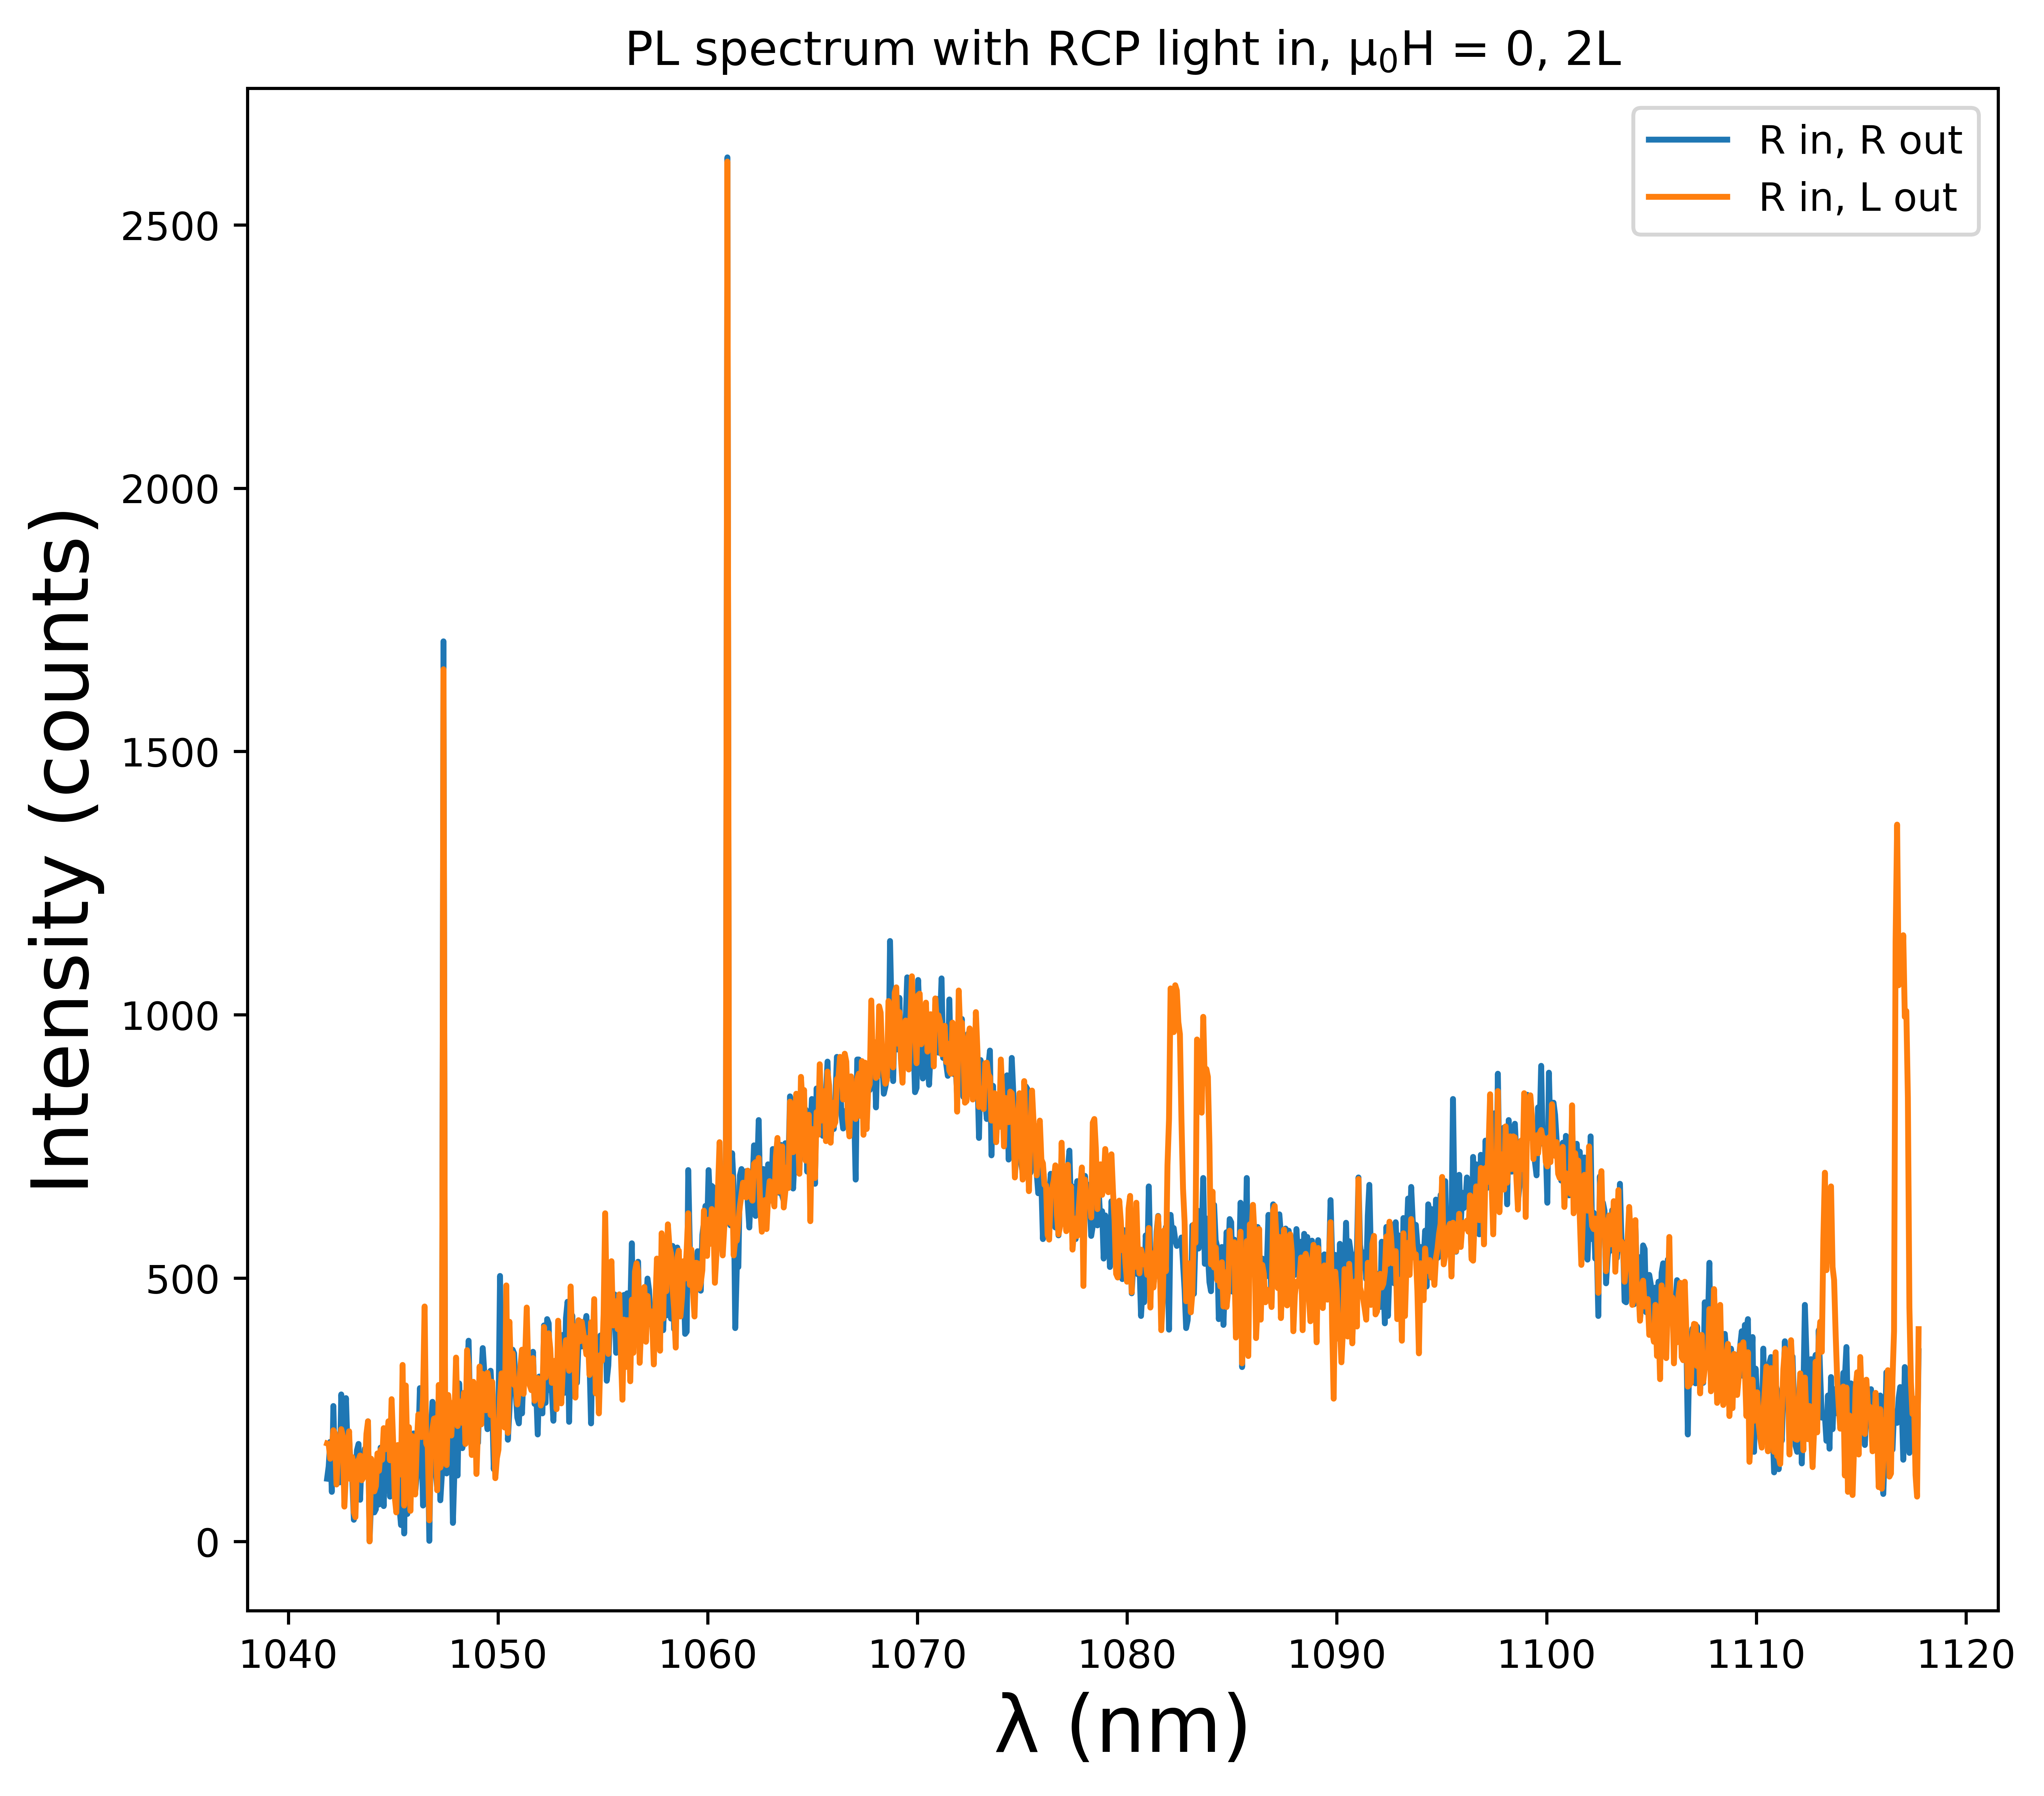

In [134]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8,7)
fig.set_dpi(800)

for dat in CPdata:
    sample = dat.metadata['sample']
    if sample == 'Flake #1 2L':
        pol = dat.metadata['pol_coll']
        sum = dat.data['Intensity_1'] + dat.data['Intensity_2'] + dat.data['Intensity_3'] - BG_sum
        sum = sum - sum.min()
        plt.plot(dat.data['Wavelength'], sum, label=f'R in, {pol} out')

plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.ylabel('Intensity (counts)', fontdict=axis_font_options)
plt.title(r'PL spectrum with RCP light in, μ$_0$H = 0, 2L')

plt.legend()
plt.show()

In [135]:
# useful line for saving to relative figures folder
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "07 CircPump 0T 2L.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')

### 08 Circular pump, fixed field

In [89]:
dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/08_CircPump_FieldDep/'
files = os.listdir(dir)
CPdata = []
for f in files:
    if f.endswith('.csv'):
        print(f)
        CPdata.append(OpticsData(dir+f))

08_CircPump_FieldDep_Rin_Rout_2L_1.5T.csv
08_CircPump_FieldDep_Rin_Lout_2L_-1.5T.csv
08_CircPump_FieldDep_Rin_Rout_3L_1.5T.csv
08_CircPump_FieldDep_Rin_Rout_3L_-1.5T.csv
08_CircPump_FieldDep_Rin_Lout_2L_1.5T.csv
08_CircPump_FieldDep_Rin_Lout_3L_1.5T.csv
08_CircPump_FieldDep_Rin_Rout_2L_-1.5T.csv
08_CircPump_FieldDep_Rin_Lout_3L_-1.5T.csv


In [90]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8,7)
fig.set_dpi(800)

for dat in CPdata:
    sample = dat.metadata['sample']
    field = dat.metadata['meas_Field']
    if sample == 'Flake #1 2L' and field > 0:
        pol = dat.metadata['pol_coll']
        sum = dat.data['Intensity_1'] + dat.data['Intensity_2'] + dat.data['Intensity_3'] - BG_sum
        sum = sum - sum.min()
        plt.plot(dat.data['Wavelength'], sum, label=f'R in, {pol} out')

plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.ylabel('Intensity (counts)', fontdict=axis_font_options)
plt.title(r'PL spectrum with RCP light in, μ$_0$H = 1.5 T, 2L')

plt.legend()
plt.show()

NameError: name 'BG_sum' is not defined

<Figure size 6400x5600 with 0 Axes>

In [152]:
# useful line for saving to relative figures folder
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "08 CircPump 1.5 T 2L.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')

### 09 Bulk measurements

In [3]:
SNR = OpticsData()

In [16]:
mat = SNR.data.to_numpy()
avg1 = numpy.mean(mat[:, 0:8:2], axis=1)
avg2 = numpy.mean(mat[:, 1:9:2], axis=1)
avg1 = avg1 - numpy.mean(avg1[0:100])
avg2 = avg2 - numpy.mean(avg2[0:100])
sig = (avg1 + avg2) / 2
noise = avg1 - avg2
std_dev = numpy.std(noise)

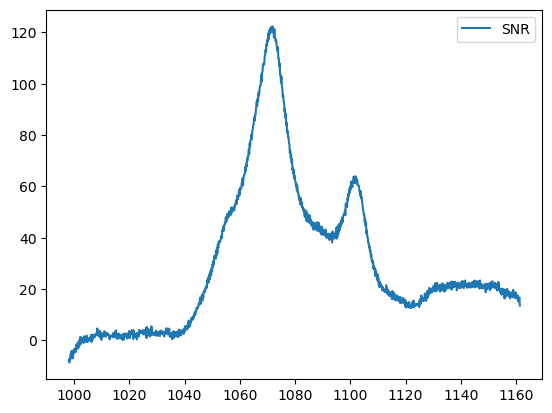

In [18]:
fig = plt.figure()

#plt.plot(mat[:, -1], sig, label='signal')
#plt.plot(mat[:, -1], noise, label='noise')
plt.plot(mat[:, -1], sig / std_dev, label='SNR')
#plt.plot(mat[:, -1], avg1, label='avg1')
#plt.plot(mat[:, -1], avg2, label='avg2')
plt.legend()
plt.show()

### 10 Temp dependence on bulk flake

In [76]:
BulkDat = []
dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/10_Bulk_TempDep/'
files = os.listdir(dir)
for f in files:
    if f.endswith('.csv'):
        BulkDat.append(OpticsData(dir+f))

BulkDat.sort(key=lambda d: d.metadata['Temp'])

In [30]:
BG = OpticsData('/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/09_Bulk/09_Bulk_Background.csv')

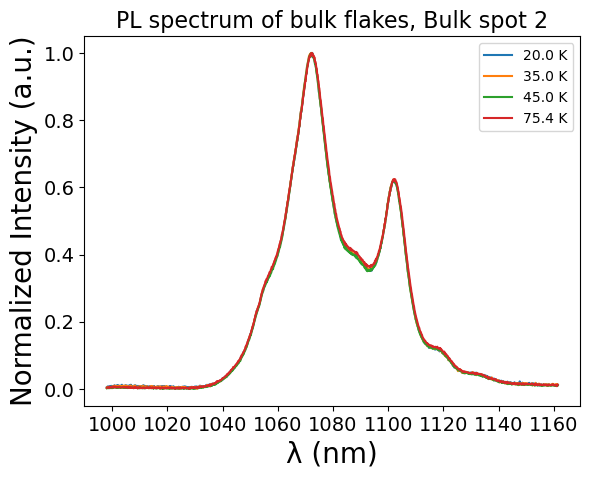

In [87]:
axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()

for dat in BulkDat:
    sample = dat.metadata['sample']
    if sample == 'Bulk Spot 2':
        temp = dat.metadata['Temp']
        sig = dat.data.iloc[:,0:-1].sum(axis=1) / dat.metadata['num_frames'] - BG.data.iloc[:,0:-1].sum(axis=1) / BG.metadata['num_frames']
        sig = sig - sig.min()
        sig = sig / sig.max()
        plt.plot(dat.data['Wavelength'], sig, label=f'{temp:.1f} K')

plt.xlabel('λ (nm)', fontdict=axis_font_options)
plt.ylabel('Normalized Intensity (a.u.)', fontdict=axis_font_options)
plt.title('PL spectrum of bulk flakes, Bulk spot 2', fontdict=title_font_options)
plt.xticks(fontsize=tick_font_options['size'])
plt.yticks(fontsize=tick_font_options['size'])
plt.legend()
plt.show()

In [88]:
# useful line for saving to relative figures folder
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/figures'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)
fig_name = "10 Bulk T dep spot 2.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')

### 11 Pol & Temp dependence

In [12]:
TempData = []
dir = '/Users/jackbarlow/Dropbox/Jack B/data/Gamelin samples/Yb3+ CrI3 Opticool 20230313/data files/11_PolnTempDep/'
files = os.listdir(dir)
for f in files:
    if f.endswith('.csv'):
        TempData.append(OpticsData(dir+f))

TempData.sort(key=lambda d: d.metadata['meas_Temp'])

KeyError: 'meas_Temp'

In [19]:
TempData[].metadata

{'meas_Temp': 35.01460266113281,
 'meas_Field': 1.50001162109375,
 'exp_time': 60,
 'num_frames': 30,
 'power': 1e-06,
 'sample': '2L',
 'grating': '600g/mm, 1um blaze',
 'pol_exc': 'R',
 'pol_coll': 'R'}